In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# handwritten package
from class_definition import * 
import functions 
import optSolver
from performance_profile import *

## Genarating Results in the report

performance_profile funciton take method and options as input and will output a txt file, containing problem name/iteration/function evaluations/gradient evaluation/cpu time/final f_value.

#### Gradient Descent

In [ ]:
method = Method('GradientDescent',step_type='wolfe')
option = Options()
performance_profile(method, option)

In [ ]:
method = Method('GradientDescent',step_type='backtracking')
option = Options()
performance_profile(method, option)

#### Modified Newton

In [ ]:
method = Method('Modified Newton',step_type='wolfe')
option = Options()
performance_profile(method, option)

In [ ]:
method = Method('Modified Newton',step_type='backtracking')
option = Options()
performance_profile(method, option)

#### TRNewtonCG

In [ ]:
method = Method('TRNewton')
option = Options()
performance_profile(method, option)

#### TRSR1CG

In [ ]:
method = Method('TRSR1CG')
option = Options()
performance_profile(method, option)

#### BFGS

In [ ]:
method = Method('BFGS', step_type='wolfe')
option = Options()
performance_profile(method, option)

In [ ]:
method = Method('BFGS', step_type='backtracking')
option = Options()
performance_profile(method, option)

#### DFP

In [ ]:
method = Method('DFP', step_type='wolfe')
option = Options()
performance_profile(method, option)

In [ ]:
method = Method('DFP', step_type='backtracking')
option = Options()
performance_profile(method, option)

### Generating plots used in the report

In [4]:
# function to plot the log optimality gap
def plot_OptimalityGap(problem: Problem, f_star: float, loc: str = 'lower right'):
    method1 = Method('GradientDescent', 'backtracking'); method2 = Method('GradientDescent', 'wolfe')
    method3 = Method('Modified Newton', 'backtracking'); method4 = Method('Modified Newton', 'wolfe')
    method5 = Method('TRNewtonCG')
    method6 = Method('TRSR1CG')
    method7 = Method('BFGS', 'backtracking'); method8 = Method('BFGS', 'wolfe')
    method9 = Method('DFP', 'backtracking'); method10 = Method('DFP', 'wolfe')
    methods = [method1, method2, method3, method4, method5, method6, method7, method8, method9, method10]

    options = Options()

    labels = ['GD_backtracking', 'GD_wolfe', 'Modified Newton_backtracking', 'Modified Newton_wolfe', 
    'TRNewtonCG', 'TRSR1CG', 'BFGS_backtracking', 'BFGS_wolfe', 'DFP_backtracking', 'DFP_wolfe']

    if f_star is not None:
        plt.figure(figsize=(8, 6))
        for i in range(10):
            x, f, k, cpu_time , f_values, norm_g_values = optSolver.optSolver(problem, methods[i], options)
            plt.plot(np.log(np.array(f_values) - f_star), label=labels[i])
        plt.xlabel('Iteration')
        plt.ylabel('Log Optimality Gap')
        plt.title(f'Optimality Gap on {problem.name}')
        plt.legend(loc=loc)
        plt.show()
    else:
        final_f_values = []
        all = []
        for i in range(10):
            x, f, k, cpu_time , f_values, norm_g_values = optSolver.optSolver(problem, methods[i], options)
            final_f_values.append(f)
            all.append(f_values)

        #print(final_f_values)   
        plt.figure(figsize=(8, 6))
        for i in range(10):
            plt.plot(np.log(np.array(all[i]) - min(final_f_values) + 1e-15), label=labels[i])

        plt.xlabel('Iteration')
        plt.ylabel('Log Optimality Gap')
        plt.title(f'Optimality Gap on {problem.name}')
        plt.legend(loc=loc)
        plt.show()

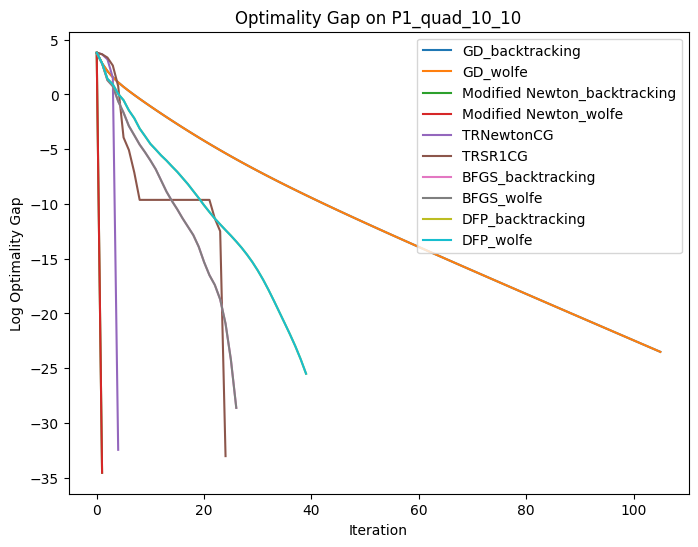

In [317]:
np.random.seed(0)
x0_1 = 20*np.random.rand(10,1)-10
problem1 = Problem('P1_quad_10_10', x0=x0_1, 
                compute_f=functions.quad_10_10_func, compute_g=functions.quad_10_10_grad, compute_H=functions.quad_10_10_Hess)
finals= plot_OptimalityGap(problem1, f_star=None, loc='upper right')

Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.


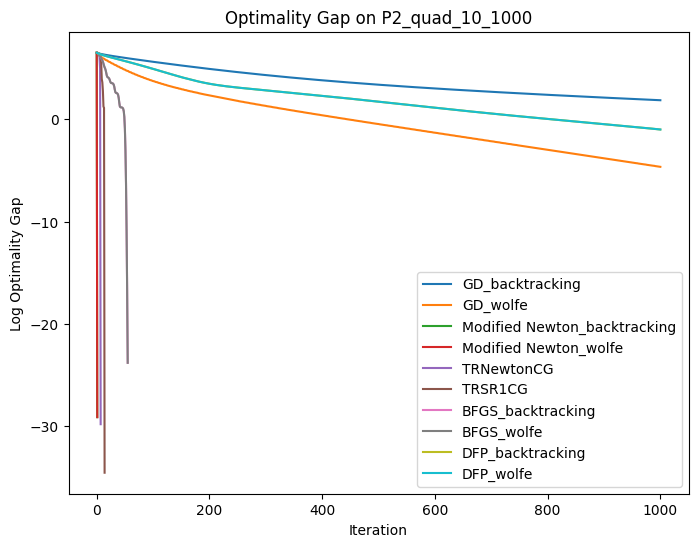

[-667.1361997228877,
 -673.6188516627087,
 -673.6285228799819,
 -673.6285228799819,
 -673.628522879982,
 -673.6285228799821,
 -673.6285228799358,
 -673.6285228799358,
 -673.2569792065965,
 -673.2569792065965]

In [318]:
problem2 = Problem('P2_quad_10_1000', x0=x0_1, 
                   compute_f=functions.quad_10_1000_func, compute_g=functions.quad_10_1000_grad, compute_H=functions.quad_10_1000_Hess)
plot_OptimalityGap(problem2, f_star=None)

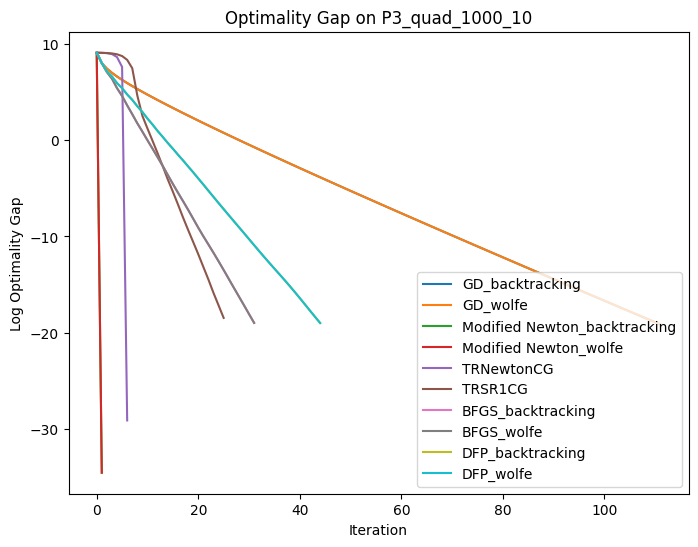

In [5]:
np.random.seed(0)
x0_2 = 20*np.random.rand(1000,1)-10
problem3 = Problem('P3_quad_1000_10', x0=x0_2, 
                   compute_f=functions.quad_1000_10_func, compute_g=functions.quad_1000_10_grad, compute_H=functions.quad_1000_10_Hess)
plot_OptimalityGap(problem3, None)

Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.


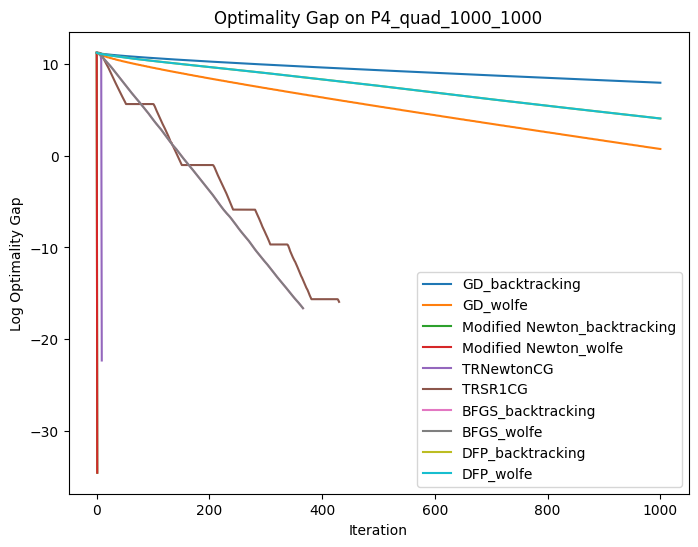

[-68655.27649333251,
 -71461.41287346111,
 -71463.47878017559,
 -71463.47878017559,
 -71463.47878017538,
 -71463.4787800546,
 -71463.47878011497,
 -71463.47878011497,
 -71406.41486567215,
 -71406.41486567215]

In [320]:
np.random.seed(0)
x0_2 = 20*np.random.rand(1000,1)-10
problem4 = Problem('P4_quad_1000_1000', x0=x0_2, 
                   compute_f=functions.quad_1000_1000_func, compute_g=functions.quad_1000_1000_grad, compute_H=functions.quad_1000_1000_Hess)
plot_OptimalityGap(problem4, None)

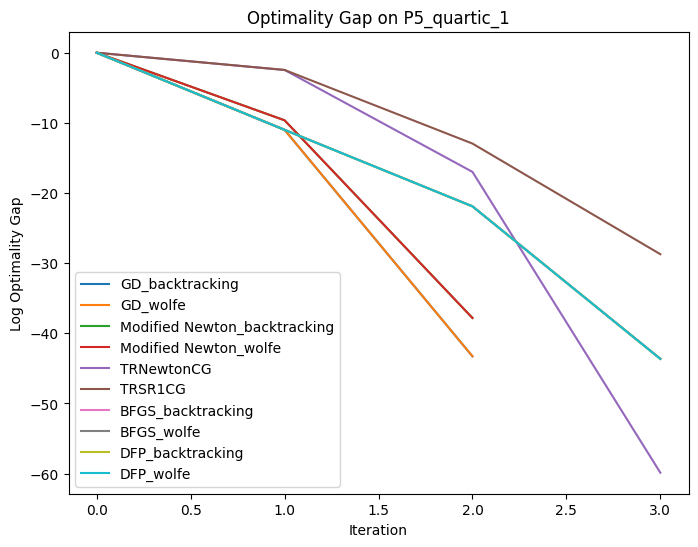

In [324]:
problem5 = Problem('P5_quartic_1', x0=np.array([math.cos(70),math.sin(70),math.cos(70),math.sin(70)]).reshape(-1,1), 
                   compute_f=functions.quartic_1_func, compute_g=functions.quartic_1_grad, compute_H=functions.quartic_1_Hess)
plot_OptimalityGap(problem5, 0.0, loc='lower left')

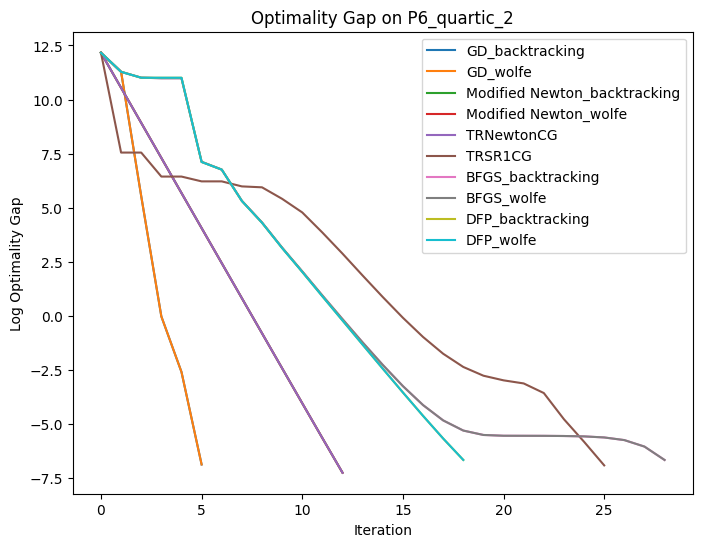

In [325]:
problem6 = Problem('P6_quartic_2', x0=np.array([math.cos(70),math.sin(70),math.cos(70),math.sin(70)]).reshape(-1,1), 
                   compute_f=functions.quartic_2_func, compute_g=functions.quartic_2_grad, compute_H=functions.quartic_2_Hess)
plot_OptimalityGap(problem6, 0.0, loc='upper right')

Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.


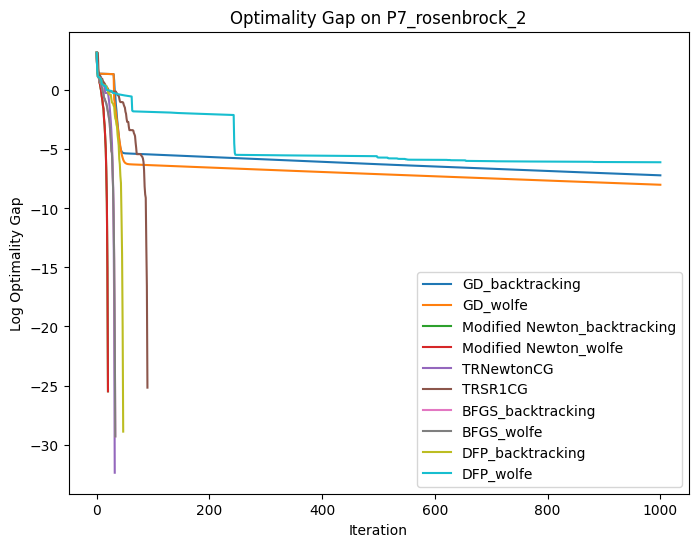

In [326]:
problem7 = Problem('P7_rosenbrock_2', x0=np.array([-1.2, 1.]).reshape(-1,1), 
                   compute_f=functions.rosen_2_func, compute_g=functions.rosen_2_grad, compute_H=functions.rosen_2_Hess)
plot_OptimalityGap(problem7, 0.0)

Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.


d:\2024_S1\IOE 511\new2\IOE_511\algorithms.py:268: RuntimeWarning: invalid value encountered in sqrt
  tau = ((-b + np.sqrt(b**2-4*a*c))/(2*a))[0,0]


Maximum number of iterations reached. Consider increasing max_iterations.


d:\2024_S1\IOE 511\new2\IOE_511\algorithms.py:261: RuntimeWarning: invalid value encountered in divide
  tau = ((-b + np.sqrt(b**2-4*a*c))/(2*a))[0,0]


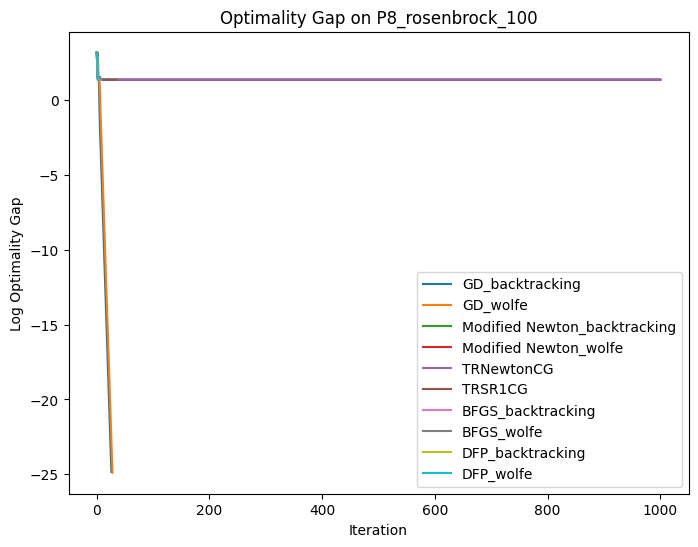

In [327]:
problem8 = Problem('P8_rosenbrock_100', x0=np.array([-1.2] + [1.]*99).reshape(-1,1),
                     compute_f=functions.Rosenbrock_100_func, compute_g=functions.Rosenbrock_100_grad, compute_H=functions.Rosenbrock_100_Hess)
plot_OptimalityGap(problem8, 0.0)

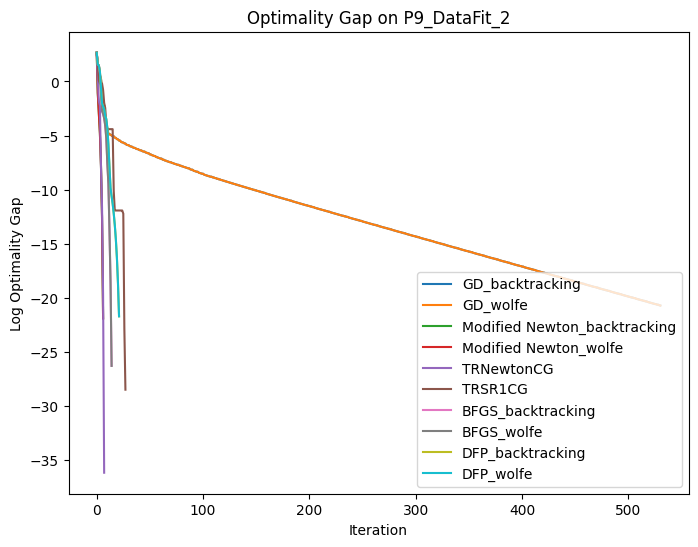

In [328]:
problem9 = Problem('P9_DataFit_2', x0=np.array([1.,1.]).reshape(-1,1),
                        compute_f=functions.DataFit_2_func, compute_g=functions.DataFit_2_grad, compute_H=functions.DataFit_2_Hess)
plot_OptimalityGap(problem9, 0.0)

d:\2024_S1\IOE 511\new2\IOE_511\functions.py:335: RuntimeWarning: overflow encountered in exp
  return (np.exp(z1)-1)/(np.exp(z1)+1) + 0.1*np.exp(-z1) + np.sum((x[1:]-1)**4)


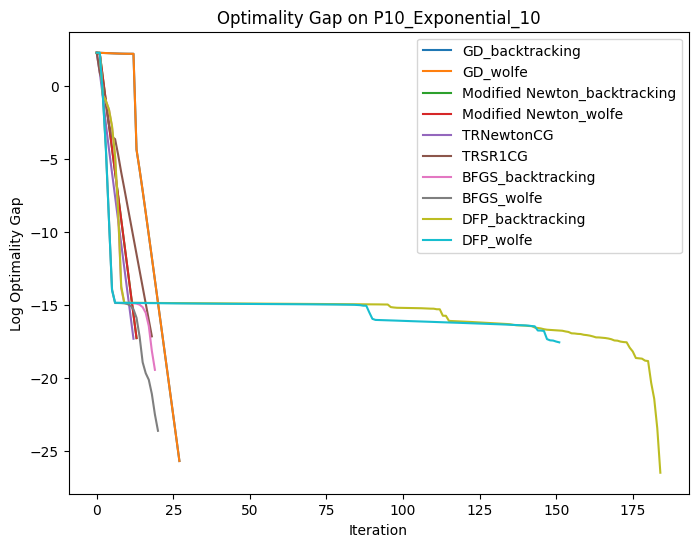

In [331]:
f_star = 2/np.sqrt(5) - 11/10
problem10 = Problem('P10_Exponential_10', x0=np.array([1.] + [.0]*9).reshape(-1,1),
                        compute_f=functions.Exponential_func, compute_g=functions.Exponential_grad, compute_H=functions.Exponential_Hess)
plot_OptimalityGap(problem10, f_star, loc='upper right')

d:\2024_S1\IOE 511\new2\IOE_511\functions.py:335: RuntimeWarning: overflow encountered in exp
  return (np.exp(z1)-1)/(np.exp(z1)+1) + 0.1*np.exp(-z1) + np.sum((x[1:]-1)**4)


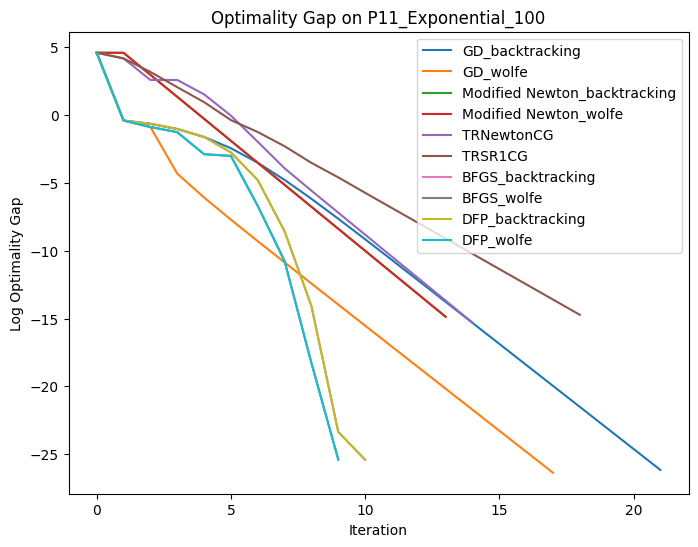

In [332]:
f_star = 2/np.sqrt(5) - 11/10
problem11 = Problem('P11_Exponential_100', x0=np.array([1.] + [.0]*99).reshape(-1,1),
                        compute_f=functions.Exponential_func, compute_g=functions.Exponential_grad, compute_H=functions.Exponential_Hess)
plot_OptimalityGap(problem11, f_star, loc='upper right')

Maximum number of iterations reached. Consider increasing max_iterations.
Maximum number of iterations reached. Consider increasing max_iterations.


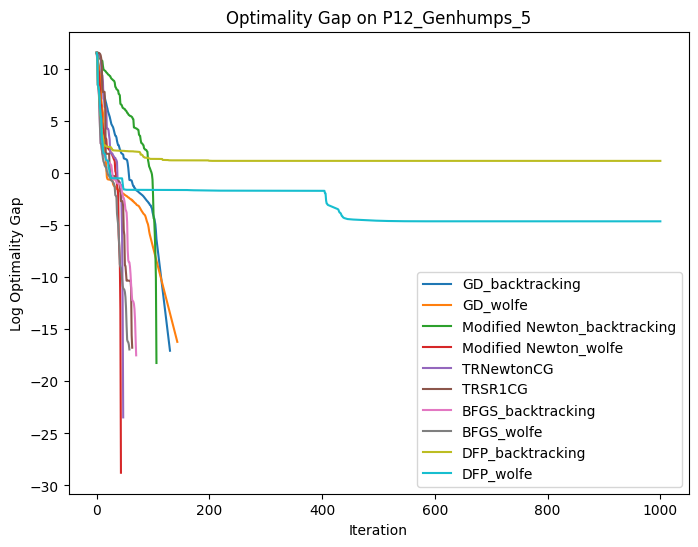

In [333]:
problem12 = Problem('P12_Genhumps_5', x0=np.array([-506.2]+[506.2]*4).reshape(-1,1),
                        compute_f=functions.genhumps_5_func, compute_g=functions.genhumps_5_grad, compute_H=functions.genhumps_5_Hess)
plot_OptimalityGap(problem12, 0.0)

### Plots used in Big Question

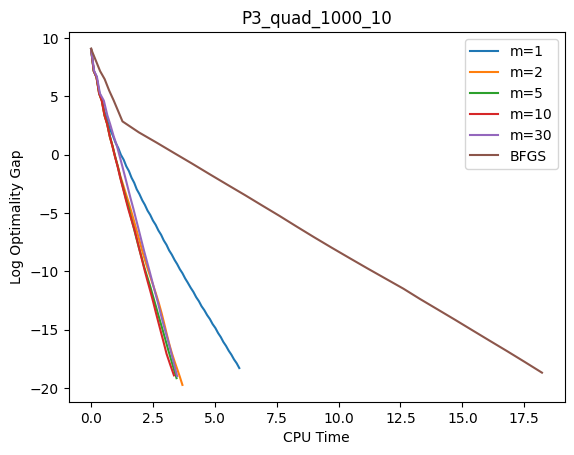

In [340]:
x0_2 = 20*np.random.rand(1000,1)-10
problem3 = Problem('P3_quad_1000_10', x0=x0_2, 
            compute_f=functions.quad_1000_10_func, compute_g=functions.quad_1000_10_grad, compute_H=functions.quad_1000_10_Hess)
method3 = Method('L-BFGS', 'wolfe')

for m in np.array([1, 2, 5, 10, 30]):
    options3 = Options(H0=np.eye(1000), m=m)
    x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem3, method3, options3)
    plt.plot(np.array(cpu_time), np.log(np.array(fs)+2014.967499067191+1e-15), label=f'm={m}')

x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem3, Method('BFGS', 'wolfe') , options3)
plt.plot(np.array(cpu_time), np.log(np.array(fs)+2014.967499067191+1e-15), label=f'BFGS')

plt.xlabel('CPU Time')
plt.ylabel('Log Optimality Gap')
plt.title(f'P3_quad_1000_10')
plt.legend()

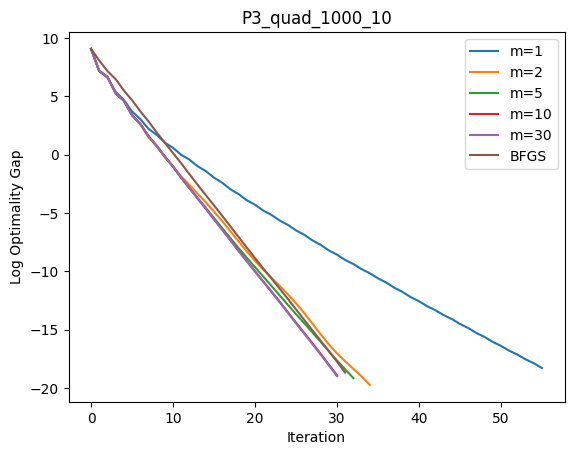

In [341]:
x0_2 = 20*np.random.rand(1000,1)-10
problem3 = Problem('P3_quad_1000_10', x0=x0_2, 
            compute_f=functions.quad_1000_10_func, compute_g=functions.quad_1000_10_grad, compute_H=functions.quad_1000_10_Hess)
method3 = Method('L-BFGS', 'wolfe')

for m in np.array([1, 2, 5, 10, 30]):
    options3 = Options(H0=np.eye(1000), m=m)
    x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem3, method3, options3)
    plt.plot(np.log(np.array(fs)+2014.967499067191+1e-15), label=f'm={m}')

x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem3, Method('BFGS', 'wolfe') , options3)
plt.plot(np.log(np.array(fs)+2014.967499067191+1e-15), label=f'BFGS')

plt.xlabel('Iteration')
plt.ylabel('Log Optimality Gap')
plt.title(f'P3_quad_1000_10')
plt.legend()

In [342]:
x0_2 = 20*np.random.rand(1000,1)-10
problem4 = Problem('P4_quad_1000_100', x0=x0_2, 
            compute_f=functions.quad_1000_1000_func, compute_g=functions.quad_1000_1000_grad, compute_H=functions.quad_1000_1000_Hess)
method4 = Method('L-BFGS', 'wolfe')

time_list = []
f_list = []

ms = [2, 5, 10, 100, 300]
for m in ms:
    options4 = Options(H0=np.eye(1000), m=m)
    x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem4, method4, options4)
    time_list.append(cpu_time)
    f_list.append(fs)

x, f, k, cpu_time, fs, norg_gs = optSolver.optSolver(problem4, Method('BFGS', 'wolfe') , Options())
time_list.append(cpu_time)
f_list.append(fs)

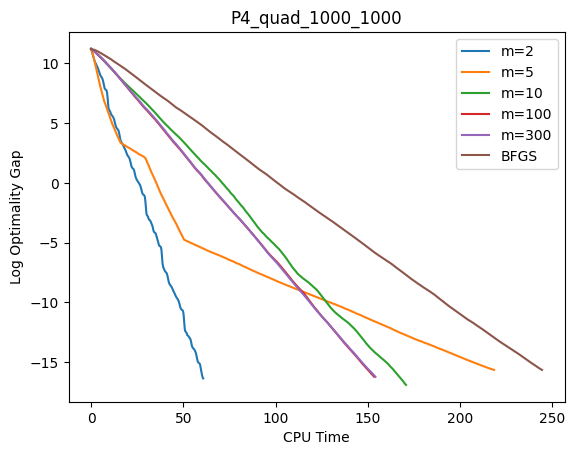

In [347]:
for i in range(len(ms)):
    plt.plot(np.array(time_list[i]), np.log(np.array(f_list[i])+71463.47878017559+1e-15), label=f'm={ms[i]}')
plt.plot(np.array(time_list[-1]), np.log(np.array(f_list[-1])+71463.47878017559+1e-15), label=f'BFGS')
plt.xlabel('CPU Time')
plt.ylabel('Log Optimality Gap')
plt.title('P4_quad_1000_1000')
plt.legend()

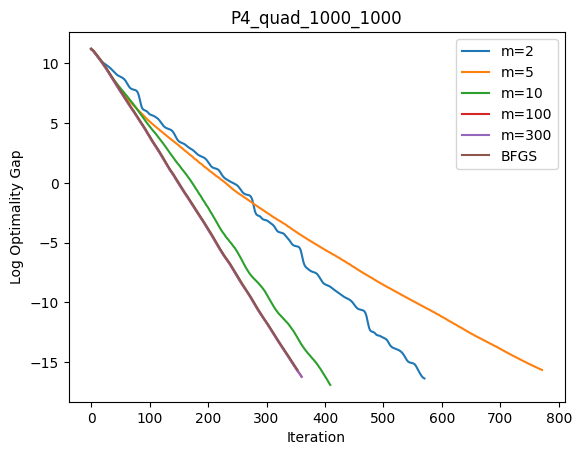

In [348]:
for i in range(len(ms)):
    plt.plot(np.log(np.array(f_list[i])+71463.47878017559+1e-15), label=f'm={ms[i]}')
plt.plot(np.log(np.array(f_list[-1])+71463.47878017559+1e-15), label=f'BFGS')
plt.xlabel('Iteration')
plt.ylabel('Log Optimality Gap')
plt.title('P4_quad_1000_1000')
plt.legend()